# 重要な特徴量の可視化

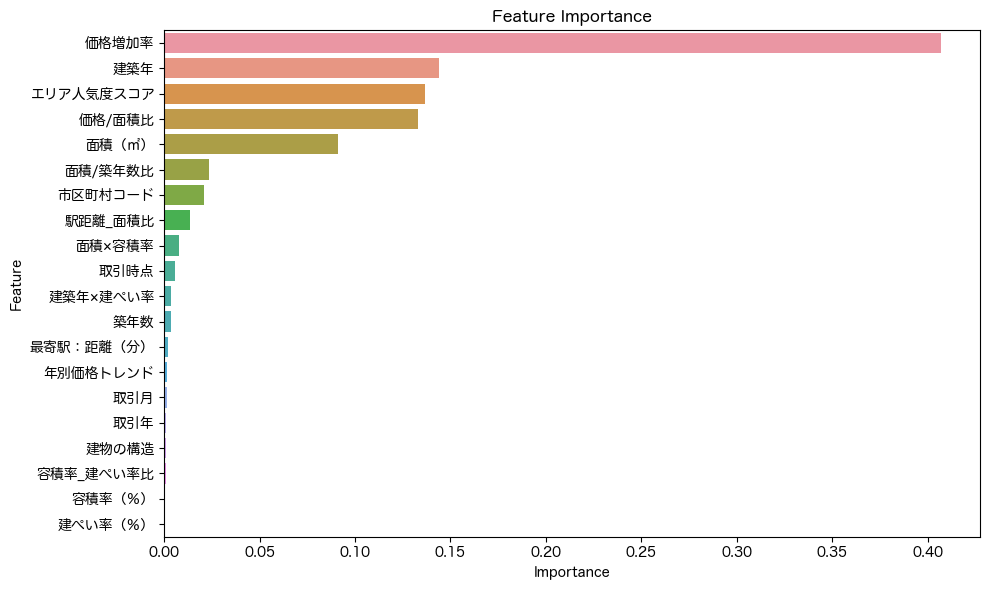

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/data/train/train_cleaned4/combined_all_train__cleaned_with_encoding.csv'
numeric_features = pd.read_csv(data_path)

# 日本語フォントの設定
plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro']  # Mac用
plt.rcParams['axes.unicode_minus'] = False

# 無限値をNaNに置き換え
numeric_features.replace([np.inf, -np.inf], np.nan, inplace=True)

# NaNを中央値で補完
numeric_features.fillna(numeric_features.median(), inplace=True)

# 説明変数と目的変数を分ける
X = numeric_features.drop(columns=['取引価格（総額）_log'])
y = numeric_features['取引価格（総額）_log']

# モデルの作成
model = RandomForestRegressor()
model.fit(X, y)

# 特徴量の重要度を取得
importances = model.feature_importances_

# 特徴量の重要度をデータフレームに格納
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# 特徴量の重要度をソート
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# プロット
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


# 重要な特徴量のリストとスケーリング

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/data/train/train_cleaned4/combined_all_train__cleaned_with_encoding.csv'
data_cleaned = pd.read_csv(data_path)

# 無限値をNaNに置き換え
data_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)

# NaN値のある行を削除
data_cleaned.dropna(inplace=True)

# 重要な特徴量のリスト
important_features = ['価格増加率', '建築年', 'エリア人気度スコア', '価格/面積比', '面積（㎡）', '面積/築年数比', '市区町村コード']

# 特徴量とターゲットの分離
X = data_cleaned[important_features]
y = data_cleaned['取引価格（総額）_log']

# スケーリングの定義
scaler = StandardScaler()

# スケーリングの適用
X_scaled = scaler.fit_transform(X)

# スケーラーを保存
scaler_path = '/Users/hayakawakazue/Downloads/data/models/combined_all_train_scaler.joblib'
joblib.dump(scaler, scaler_path)

# スケーリング結果をデータフレームに変換
X_scaled_df = pd.DataFrame(X_scaled, columns=important_features)
X_scaled_df['取引価格（総額）_log'] = y.values

# データを保存
data_preprocessed_path = '/Users/hayakawakazue/Downloads/data/train/train_cleaned5/combined_all_train_cleaned_preprocessed.csv'
X_scaled_df.to_csv(data_preprocessed_path, index=False)

print(f"データを保存しました: {data_preprocessed_path}")
print(X_scaled_df.head())

# データの行数と列数をプリントする
print(f"データの行数: {X_scaled_df.shape[0]}")
print(f"データの列数: {X_scaled_df.shape[1]}")


データを保存しました: /Users/hayakawakazue/Downloads/data/train/train_cleaned5/combined_all_train_cleaned_preprocessed.csv
      価格増加率       建築年  エリア人気度スコア    価格/面積比     面積（㎡）   面積/築年数比   市区町村コード  \
0 -0.014136  0.057071  -0.904652 -0.674436  0.972612 -0.066539 -1.810998   
1 -0.800723 -1.123200  -0.796340  0.642300 -1.285655 -0.484549 -1.811724   
2  1.128609 -0.306090  -0.796340 -0.459233  0.295132 -0.262934 -1.811724   
3 -1.638666 -1.123200  -0.904652 -0.699012  0.972612 -0.327540 -1.810998   
4 -0.499690 -1.849520  -0.796340  0.082064 -0.834002 -0.476250 -1.811724   

   取引価格（総額）_log  
0      7.079181  
1      6.755875  
2      7.204120  
3      6.875061  
4      6.681241  
データの行数: 613544
データの列数: 8
